# How-To: Python Compare Two Images
https://www.pyimagesearch.com/2014/09/15/python-compare-two-images/


Use of algorithms such as
* Mean Squared Error (MSE) 
* Structural Similarity Index (SSIM).

## Mean Squared Error (MSE) 
- lower is better
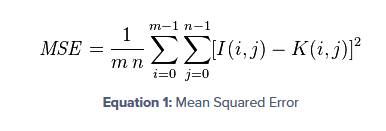

In [8]:
import numpy as np
import cv2 as cv

imageA = cv.imread("Computer-Vision-with-Python-Udemy/DATA/sammy_noise.jpg",0); #B&W
imageB = cv.imread("Computer-Vision-with-Python-Udemy/DATA/sammy.jpg",0); #B&W

print(imageA.shape);

def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
    err = np. sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    
    # return the MSE, the lower the error, the more "similar"
    # the two images are 
    return err
print("MSE calculated : {}".format(mse(imageA,imageB)));
print("Lower is better")

(1367, 1025)
MSE calculated : 381.69795207593626
Lower is better


### To over come Issues With MSE ==> SSIM
 such as,
- e.g For same image with different pixel intensities MSE might be large w r t to number of pixels with different intensities

## SSIM -Structural Similarity Index
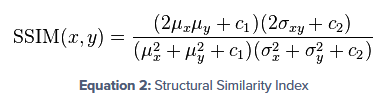

- Equation is used to compare two windows (i.e. small sub-samples) rather than the entire image as in MSE. 
- Perceived change in the structural information of the image
- The SSIM value can vary between -1 and 1, where 1 indicates perfect similarity.

In [22]:
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline
    
#print(ssim(imageA,imageA));
def compare_images(imageA, imageB, title):
    # Compute the mean squared error and Structural similarity
    # index for the images 
    m = mse(imageA, imageB)
    s = ssim( imageA, imageB)
    
    # setup the figure
    fig = plt.figure(title)
    plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m,s))
    
    # show first image 
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = plt.cm.gray)
    plt.axis("off")
    
    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = plt.cm.gray)
    plt.axis("off")
    
    # show the images
    plt.show()

<class 'tuple'>


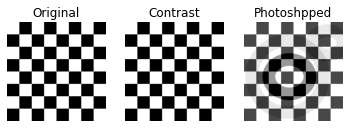

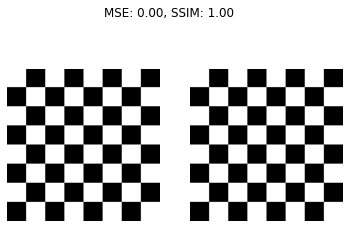

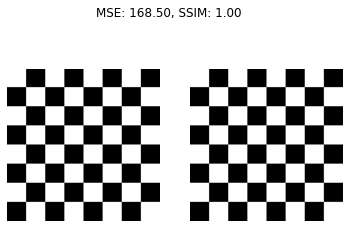

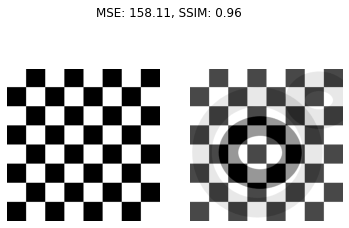

In [26]:
# load the images -- the original, original + coontrast, the original + photoshoped
original = cv2.imread("Computer-Vision-with-Python-Udemy/DATA/flat_chessboard.png");
contrast = cv2.imread("Computer-Vision-with-Python-Udemy/DATA/flat_chessboard_contrast.png")
shopped = cv2.imread("Computer-Vision-with-Python-Udemy/DATA/flat_chessboard_photoshoped.png")

# convert the images to grayscale
original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
contrast = cv2.cvtColor(contrast, cv2.COLOR_BGR2GRAY)
shopped = cv2.cvtColor(shopped, cv2.COLOR_BGR2GRAY)

# initialize the figure 
fig = plt.figure("Images")
images = ("Original", original), ("Contrast", contrast), ("Photoshpped", shopped)
print(type(images))

# loop over the images 
for (i, (name, image)) in enumerate(images):
    # show the image 
    ax = fig.add_subplot(1, 3, i + 1)
    ax.set_title(name)
    plt.imshow(image, cmap = plt.cm.gray)
    plt.axis("off")

# show the figure
plt.show()

# compare the images 
compare_images(original, original, "Original vs Original")
compare_images(original, contrast, "Original vs Contrast")
compare_images(original, shopped, "Original vs Photoshopped")